In [ ]:
# Installing libraries
!pip install reportlab

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.models import Model
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Image, Spacer
from reportlab.lib.styles import getSampleStyleSheet
from sklearn.model_selection import train_test_split
# Loading Stopping words
stop_words = set(stopwords.words('english'))


In [ ]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df = df[['target', 'text']]
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Display the number of records is our dataset :
print('length of data is', len(df))

length of data is 1600000


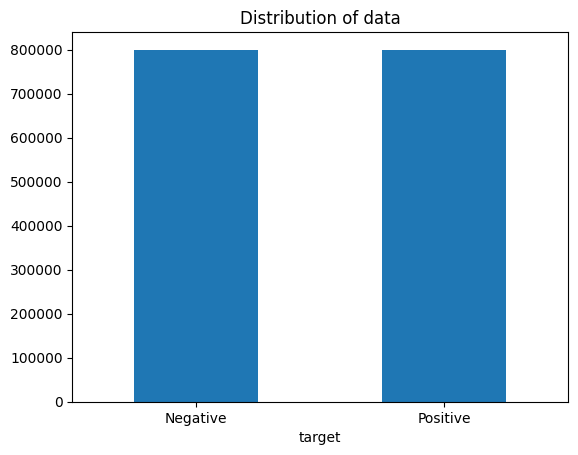

In [ ]:
# Plotting the distribution for dataset :
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
# Naming 0 -> Negative , and 4 -> Positive
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists :
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

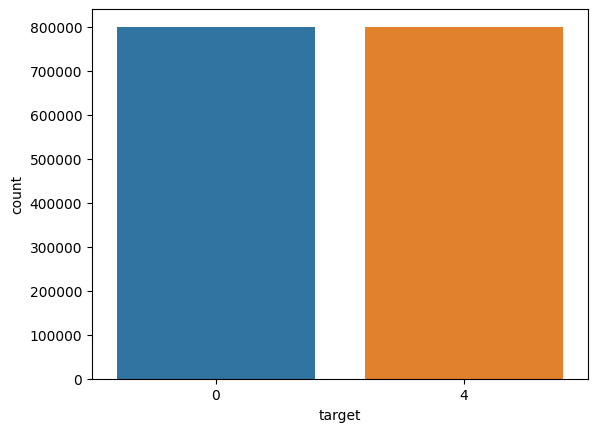

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [ ]:
# Clean the data
def clean_text(sentence):
    sentence = re.sub(r"https?://\S+|www\.\S+", " ", sentence)
    sentence = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});", " ", sentence)
    sentence = re.sub(r"[^\w\s]", " ", sentence)
    sentence = re.sub(r"\w*\d\w*", " ", sentence)
    sentence = re.sub(r"[0-9]+", " ", sentence)
    sentence = re.sub(r"\s+", " ", sentence).strip().lower()
    tokens = [token for token in sentence.split() if token not in stop_words]
    return " ".join(tokens)

In [ ]:
df['text'] = df['text'].apply(clean_text)

In [ ]:
# Convert the labels to numerical values
df['target'].replace(4, 1, inplace=True)


/tmp/ipykernel_34/159065382.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['target'].replace(4, 1, inplace=True)


In [ ]:
df['target']

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64

In [ ]:
df

,target,text
0,0,switchfoot awww bummer shoulda got david carr ...
1,0,upset update facebook texting might cry result...
2,0,kenichan dived many times ball managed save re...
3,0,whole body feels itchy like fire
4,0,nationwideclass behaving mad see
...,...,...
1599995,1,woke school best feeling ever
1599996,1,thewdb com cool hear old walt interviews â
1599997,1,ready mojo makeover ask details
1599998,1,happy birthday boo alll time tupac amaru shakur


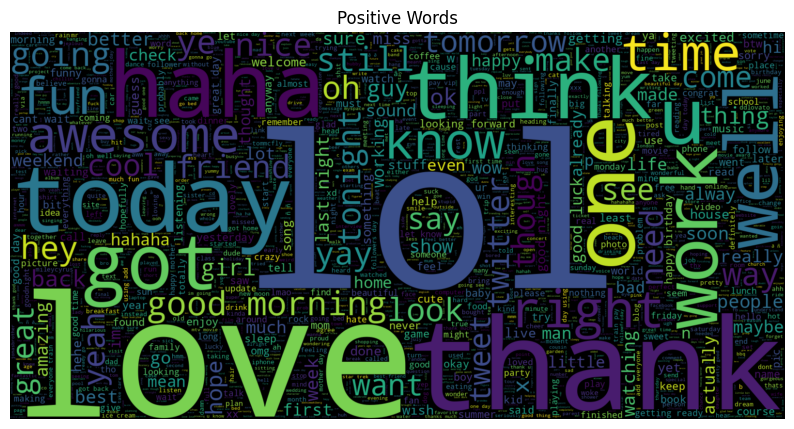

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

# Filter positive sentiment rows
positive_df = df[df['target'] == 1]

# Join the cleaned text from the positive sentiment rows
positive_text = " ".join(positive_df['text'])

# Generate WordCloud
plt.figure(figsize=(10, 10))
wc = WordCloud(max_words=2000, width=1600, height=800).generate(positive_text)
plt.title("Positive Words")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Turn off axis numbers
plt.show()

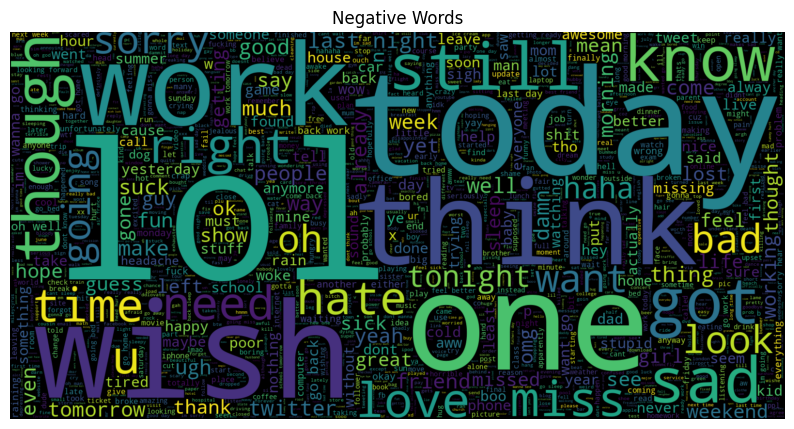

In [ ]:
# Filter negative sentiment rows
negative_df = df[df['target'] == 0]  # 0 indicate negative sentiment

# Join the cleaned text from the negative sentiment rows
negative_text = " ".join(negative_df['text'])

# Generate WordCloud for negative words
plt.figure(figsize=(10, 10))
wc_negative = WordCloud(max_words=2000, width=1600, height=800).generate(negative_text)
plt.title("Negative Words")
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis("off")  # Turn off axis numbers
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.3, random_state=42)
# Optionally, you can check the shapes of the subsets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1120000,)
X_test shape: (480000,)
y_train shape: (1120000,)
y_test shape: (480000,)


In [ ]:
# Clean and tokenize the text data
max_words = 15000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequence_X_train = tokenizer.texts_to_sequences(X_train)
sequence_X_test = tokenizer.texts_to_sequences(X_test)
vocab_length = len(tokenizer.word_index)

# Pad the sequences to have the same length
maxlen = max(len(sequence) for sequence in sequence_X_train)
padded_X_train = pad_sequences(sequence_X_train, maxlen=maxlen)
padded_X_test = pad_sequences(sequence_X_test, maxlen=maxlen)

# Convolutional Kernel

# Model 1 --> 3 Conv with filters size (32 ,64 ,128 )

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D, Embedding, Dropout, LSTM
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define CNN model 1
input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_length+1, 20)(input_layer)
conv1 = Conv1D(32, 3, activation='relu')(embedding_layer)
pool1 = MaxPooling1D(3)(conv1)
drop1 = Dropout(0.5)(pool1)
conv2 = Conv1D(64, 3, activation='relu')(drop1)
pool2 = MaxPooling1D(3)(conv2)
conv3 = Conv1D(128, 3, activation='relu')(pool2)
global_pooling = GlobalMaxPooling1D()(conv3)
drop2 = Dropout(0.5)(global_pooling)
output_layer = Dense(1, activation='sigmoid')(drop2)
model1 = Model(input_layer, output_layer)
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 54s 6ms/step - accuracy: 0.7352 - loss: 0.5248 - val_accuracy: 0.7774 - val_loss: 0.4875
Epoch 2/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 0.7788 - loss: 0.4685 - val_accuracy: 0.7801 - val_loss: 0.4832
Epoch 3/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - accuracy: 0.7862 - loss: 0.4560 - val_accuracy: 0.7754 - val_loss: 0.4958
Epoch 4/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 0.7927 - loss: 0.4470 - val_accuracy: 0.7756 - val_loss: 0.4913
Epoch 5/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 0.7966 - loss: 0.4391 - val_accuracy: 0.7764 - val_loss: 0.4917


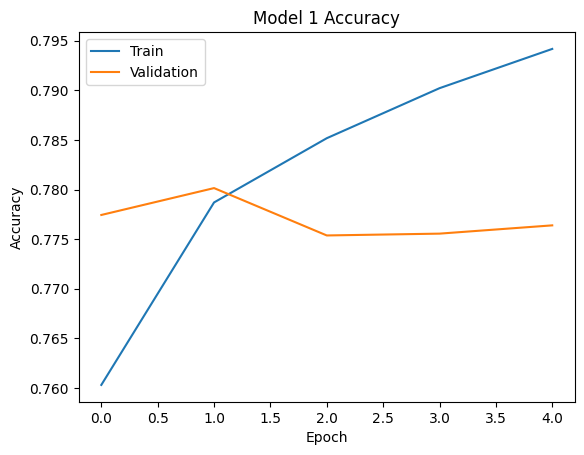

In [ ]:
history = model1.fit(padded_X_train, y_train, validation_data=(padded_X_test, y_test), epochs=5, batch_size=128)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("Model_1_history.png")
plt.show()

In [ ]:
test_loss, test_acc = model1.evaluate(padded_X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.7761 - loss: 0.4917
Test Accuracy: 77.64%


15000/15000 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step


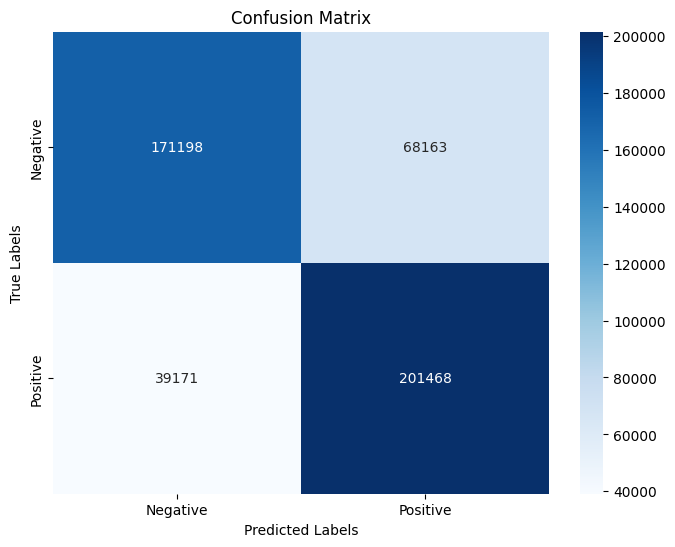

In [ ]:
y_pred = model1.predict(padded_X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
y_true = y_test
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig(f"Model_1_confusion_matrix.png")
plt.show()

In [ ]:
model1.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 116)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_8 (Embedding)         │ (None, 116, 20)        │     8,419,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 114, 32)        │         1,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 38, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 38, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 36, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 10, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,357,481 (96.73 MB)

 Trainable params: 8,452,493 (32.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,904,988 (64.49 MB)

# Model 2 --> 2 Conv with filter size 128


In [ ]:
# Define CNN model 2
embedding_dim = 100
filters = 128
kernel_size = 5

inputs = Input(shape=(maxlen,))
x = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen)(inputs)
x = Conv1D(filters, kernel_size, activation='relu')(x)
x = MaxPooling1D()(x)
x = Conv1D(filters, kernel_size, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs=inputs, outputs=outputs)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 57s 6ms/step - accuracy: 0.7536 - loss: 0.4968 - val_accuracy: 0.7847 - val_loss: 0.4537
Epoch 2/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 0.7980 - loss: 0.4342 - val_accuracy: 0.7868 - val_loss: 0.4531
Epoch 3/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 0.8175 - loss: 0.3990 - val_accuracy: 0.7831 - val_loss: 0.4616
Epoch 4/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 0.8391 - loss: 0.3588 - val_accuracy: 0.7772 - val_loss: 0.4826
Epoch 5/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 0.8620 - loss: 0.3136 - val_accuracy: 0.7726 - val_loss: 0.5399


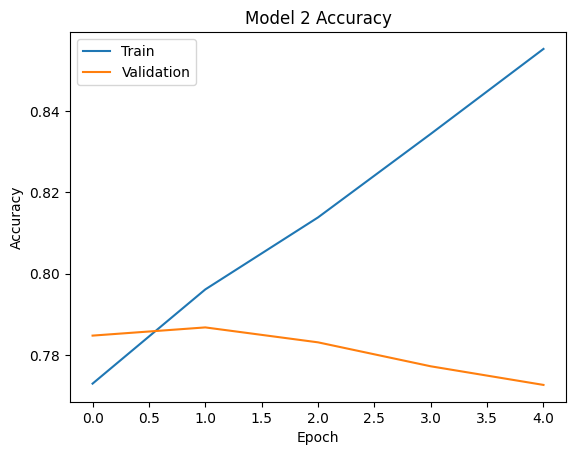

In [ ]:
history = model2.fit(padded_X_train, y_train, validation_data=(padded_X_test, y_test), epochs=5, batch_size=128)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("Model_2_history.png")
plt.show()

In [ ]:
test_loss, test_acc = model2.evaluate(padded_X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.7725 - loss: 0.5409
Test Accuracy: 77.26%


15000/15000 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step


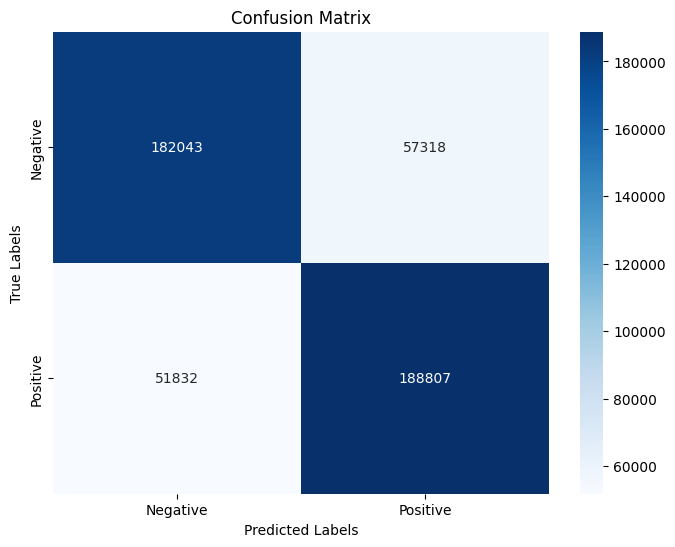

In [ ]:
y_pred = model2.predict(padded_X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
y_true = y_test
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig(f"Model_2_confusion_matrix.png")
plt.show()

In [ ]:
model2.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 116)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_9 (Embedding)         │ (None, 116, 100)       │     1,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 112, 128)       │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 56, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 52, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_7          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,988,453 (19.03 MB)

 Trainable params: 1,662,817 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,325,636 (12.69 MB)

# Model 3 --> 3 Conv with filter size 128

In [ ]:
# Define CNN model
embedding_dim = 100
filters = 128
kernel_size = 5

# Input layer
inputs = Input(shape=(maxlen,))
# Embedding layer
x = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen)(inputs)
# Convolutional layers
x = Conv1D(filters, kernel_size, activation='relu')(x)
x = MaxPooling1D()(x)
x = Conv1D(filters, kernel_size, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
# Fully connected layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create model
model3 = Model(inputs=inputs, outputs=outputs)
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 58s 6ms/step - accuracy: 0.7543 - loss: 0.4975 - val_accuracy: 0.7824 - val_loss: 0.4563
Epoch 2/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 0.7971 - loss: 0.4352 - val_accuracy: 0.7871 - val_loss: 0.4497
Epoch 3/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 0.8172 - loss: 0.3998 - val_accuracy: 0.7835 - val_loss: 0.4614
Epoch 4/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 0.8399 - loss: 0.3577 - val_accuracy: 0.7774 - val_loss: 0.4817
Epoch 5/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 0.8609 - loss: 0.3146 - val_accuracy: 0.7708 - val_loss: 0.5410


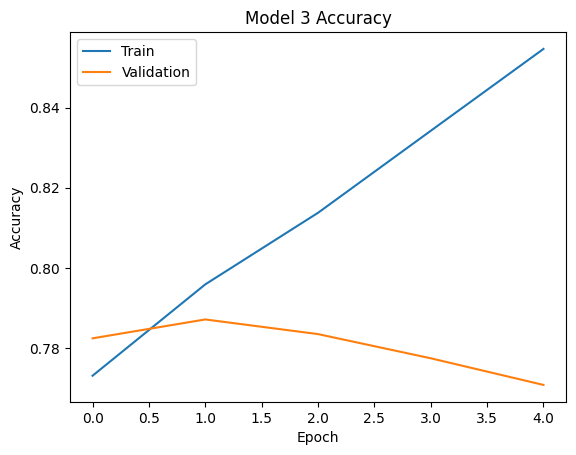

In [ ]:
history = model3.fit(padded_X_train, y_train, validation_data=(padded_X_test, y_test), epochs=5, batch_size=128)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("Model_3_history.png")
plt.show()

In [ ]:
test_loss, test_acc = model3.evaluate(padded_X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.7701 - loss: 0.5424
Test Accuracy: 77.08%


15000/15000 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step


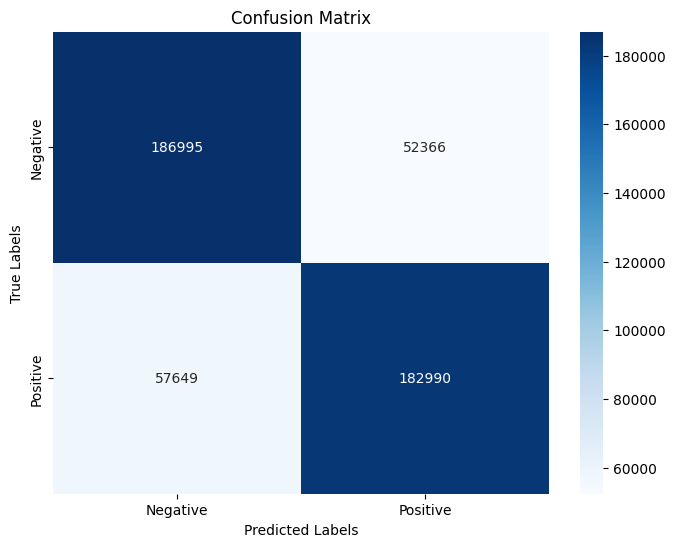

In [ ]:
y_pred = model3.predict(padded_X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
y_true = y_test
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig(f"Model_3_confusion_matrix.png")
plt.show()

In [ ]:
model3.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 116)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_10 (Embedding)        │ (None, 116, 100)       │     1,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 112, 128)       │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 56, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 52, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_8          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,988,453 (19.03 MB)

 Trainable params: 1,662,817 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,325,636 (12.69 MB)

# Model 4 ---> LSTM

In [ ]:
# Define RNN model with LSTM
embedding_dim = 100
rnn_units = 128

input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim)(input_layer)
rnn_layer = LSTM(rnn_units)(embedding_layer)
dense_layer = Dense(64, activation='relu')(rnn_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

model4 = Model(inputs=input_layer, outputs=output_layer)
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 110s 12ms/step - accuracy: 0.7594 - loss: 0.4894 - val_accuracy: 0.7856 - val_loss: 0.4518
Epoch 2/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 108s 12ms/step - accuracy: 0.7941 - loss: 0.4354 - val_accuracy: 0.7898 - val_loss: 0.4462
Epoch 3/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 108s 12ms/step - accuracy: 0.8068 - loss: 0.4129 - val_accuracy: 0.7902 - val_loss: 0.4468
Epoch 4/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 108s 12ms/step - accuracy: 0.8205 - loss: 0.3893 - val_accuracy: 0.7871 - val_loss: 0.4545
Epoch 5/5
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 108s 12ms/step - accuracy: 0.8352 - loss: 0.3629 - val_accuracy: 0.7843 - val_loss: 0.4733


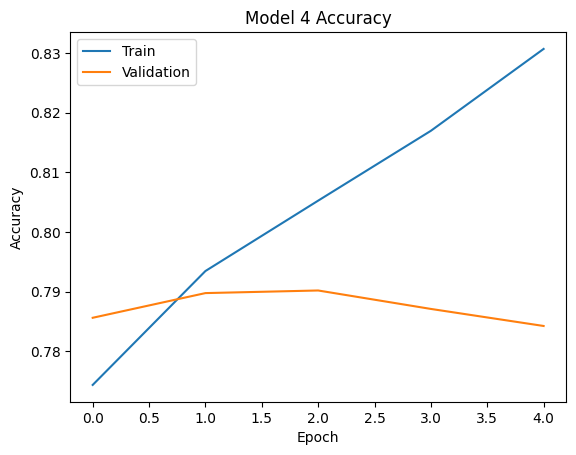

In [ ]:
history = model4.fit(padded_X_train, y_train, validation_data=(padded_X_test, y_test), epochs=5, batch_size=128)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("Model_4_history.png")
plt.show()

In [ ]:
test_loss, test_acc = model4.evaluate(padded_X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.7840 - loss: 0.4737
Test Accuracy: 78.43%


15000/15000 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step


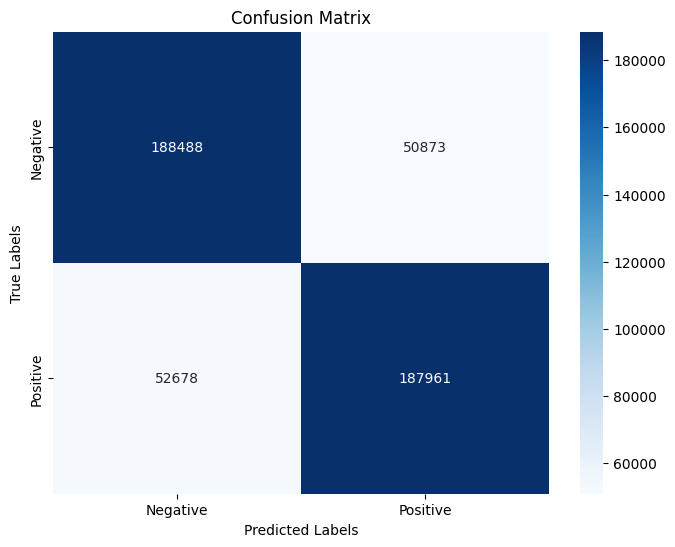

In [ ]:
y_pred = model4.predict(padded_X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
y_true = y_test
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig(f"Model_4_confusion_matrix.png")
plt.show()


In [ ]:
model4.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 116)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_11 (Embedding)        │ (None, 116, 100)       │     1,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,876,709 (18.60 MB)

 Trainable params: 1,625,569 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,251,140 (12.40 MB)

# PDF

In [ ]:
# Assuming X_test, padded_X_test, and y_test are correctly defined and populated
# Also assuming model1, model2, model3, and model4 are defined and trained

from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
import numpy as np

# Define the PDF components and styles
doc = SimpleDocTemplate("Results.pdf", pagesize=letter)
styles = getSampleStyleSheet()


def generate_results_pdf(model_list, X_test, padded_X_test, y_test):
    pdf_components = []
    for i, model_data in enumerate(model_list, start=1):
        # Evaluate the model
        test_loss, test_acc = model_data["model"].evaluate(model_data["test_data"], model_data["test_labels"])
        print(f'Model {i} - Test Accuracy: {test_acc * 100:.2f}%')

        # Add components to PDF
        if i == 1:
            heading = Paragraph(f"Model {i}: 3 Conv with filters size (32, 64, 128)", styles["Heading1"])
        elif i == 2:
            heading = Paragraph(f"Model {i}: 2 Conv with filter size 128", styles["Heading1"])
        elif i == 3:
            heading = Paragraph(f"Model {i}: 3 Conv with filter size 128", styles["Heading1"])
        else:
            heading = Paragraph(f"Model {i}: LSTM", styles["Heading1"])

        text = f"Test Accuracy: {test_acc * 100:.2f}%"
        para1 = Paragraph(text, styles["Normal"])
        img_history = Image(f"Model_{i}_history.png", width=400, height=300)
        img_confusion = Image(f"Model_{i}_confusion_matrix.png", width=400, height=300)
        pdf_components += [heading, Spacer(1, 20), para1, Spacer(1, 20)]

        # Add 10 random examples from X_test along with their predictions and true values

        random_indices = np.random.choice(100,10, replace=False)
        for idx in random_indices:
            x_example = X_test.iloc[idx]
            y_true = y_test.iloc[idx]
            x_example_padded = padded_X_test[idx]

            y_pred = np.argmax(model_data["model"].predict(np.array([x_example_padded])), axis=-1)[0]
            print(f'random x_example {i} :')
            print(x_example)
            print("Y_pred: " + str(y_pred))
            print("Y_true: " + str(y_true))
            para2 = Paragraph(f"Example: {x_example}<br/>Predicted: {y_pred}<br/>True Value: {y_true}", styles["Normal"])
            pdf_components += [para2, Spacer(1, 20)]
        pdf_components += [img_history, Spacer(1, 20), img_confusion, Spacer(1, 20)]
            # Conclusion
     heading_conclusion = Paragraph("Conclusion:", styles["Heading1"])
         text_conclusion = ("Based on the results, both the CNN and LSTM models achieved similar test accuracies, with the LSTM model slightly outperforming the CNN model (CNN1: 78.07% ,CNN2: 76.78%, CNN3: 77.10% , LSTM: 78.33%). The CNN model demonstrated higher training accuracy and lower training loss, suggesting a better fit to the training data. However, it also showed more significant overfitting, as evidenced by a larger increase in validation loss during training. In contrast, the RNN model exhibited better generalization to unseen data, with slightly higher validation accuracy and lower validation loss compared to the CNN model.")

para_conclusion = Paragraph(text_conclusion, styles["Normal"])
pdf_components += [heading_conclusion, Spacer(1, 20), para_conclusion]

    # Build PDF
doc.build(pdf_components)

# List of models (assuming you have initialized model1, model2, model3, model4 earlier)
model_list = [
    {"model": model1, "train_data": padded_X_train, "train_labels": y_train, "test_data": padded_X_test, "test_labels": y_test},
    {"model": model2, "train_data": padded_X_train, "train_labels": y_train, "test_data": padded_X_test, "test_labels": y_test},
    {"model": model3, "train_data": padded_X_train, "train_labels": y_train, "test_data": padded_X_test, "test_labels": y_test},
    {"model": model4, "train_data": padded_X_train, "train_labels": y_train, "test_data": padded_X_test, "test_labels": y_test}
]

# Assuming X_test, padded_X_test, and y_test are defined earlier and contain your data
# Generate PDF report
generate_results_pdf(model_list, X_test, padded_X_test, y_test)

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - accuracy: 0.7761 - loss: 0.4917
Model 1 - Test Accuracy: 77.64%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
random x_example 1 :
suzyspaatz hi sounds like feeling bit better great great day
Y_pred: 0
Y_true: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
random x_example 1 :
day pass slowly days rawr
Y_pred: 0
Y_true: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
random x_example 1 :
full fizz enough cider
Y_pred: 0
Y_true: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
random x_example 1 :
find someone
Y_pred: 0
Y_true: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
random x_example 1 :
lilpecan oh really great small blizzard also cold wind blows
Y_pred: 0
Y_true: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
random x_example 1 :
joshlam old really
Y_pred: 0
Y_true: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
random x_example 1 :
theuncoolest
Y_pred: 0
Y_true: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
random x_example 1 :
batyasmusic really reason haha sounds stupid
Y_pred: 0
Y_tr

In [ ]:
    # Conclusion
heading_conclusion = Paragraph("Conclusion:", styles["Heading1"])
text_conclusion = ("Based on the results, both the CNN and LSTM models achieved similar test accuracies, with the LSTM model slightly outperforming the CNN model (CNN1: 78.07% ,CNN2: 76.78%, CNN3: 77.10% , LSTM: 78.33%). The CNN model demonstrated higher training accuracy and lower training loss, suggesting a better fit to the training data. However, it also showed more significant overfitting, as evidenced by a larger increase in validation loss during training. In contrast, the RNN model exhibited better generalization to unseen data, with slightly higher validation accuracy and lower validation loss compared to the CNN model.")

para_conclusion = Paragraph(text_conclusion, styles["Normal"])
pdf_components += [heading_conclusion, Spacer(1, 20), para_conclusion]

    # Build PDF
doc.build(pdf_components)

In [ ]:
pdf_components

[]

In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
import numpy as np

def generate_results_pdf(model_list, X_test, padded_X_test, y_test):
    # Define the PDF components and styles
    doc = SimpleDocTemplate("Results.pdf", pagesize=letter)
    styles = getSampleStyleSheet()
    pdf_components = []
    for i, model_data in enumerate(model_list, start=1):
        # Evaluate the model
        test_loss, test_acc = model_data["model"].evaluate(model_data["test_data"], model_data["test_labels"])
        print(f'Model {i} - Test Accuracy: {test_acc * 100:.2f}%')

        # Add components to PDF
        if i == 1:
            heading = Paragraph(f"Model {i}: 3 Conv with filters size (32, 64, 128)", styles["Heading1"])
        elif i == 2:
            heading = Paragraph(f"Model {i}: 2 Conv with filter size 128", styles["Heading1"])
        elif i == 3:
            heading = Paragraph(f"Model {i}: 3 Conv with filter size 128", styles["Heading1"])
        else:
            heading = Paragraph(f"Model {i}: LSTM", styles["Heading1"])

        text = f"Test Accuracy: {test_acc * 100:.2f}%"
        para1 = Paragraph(text, styles["Normal"])
        img_history = Image(f"Model_{i}_history.png", width=400, height=300)
        img_confusion = Image(f"Model_{i}_confusion_matrix.png", width=400, height=300)
        pdf_components += [heading, Spacer(1, 20), para1, Spacer(1, 20)]

        # Add 10 random examples from X_test along with their predictions and true values

        random_indices = np.random.choice(100,10, replace=False)
        for idx in random_indices:
            x_example = X_test.iloc[idx]
            y_true = y_test.iloc[idx]
            x_example_padded = padded_X_test[idx]

            y_pred = np.argmax(model_data["model"].predict(np.array([x_example_padded])), axis=-1)[0]
            print(f'random x_example {i} :')
            print(x_example)
            print("Y_pred: " + str(y_pred))
            print("Y_true: " + str(y_true))
            para2 = Paragraph(f"Example: {x_example}<br/>Predicted: {y_pred}<br/>True Value: {y_true}", styles["Normal"])
            pdf_components += [para2, Spacer(1, 20)]
        pdf_components += [img_history, Spacer(1, 20), img_confusion, Spacer(1, 20)]
            # Conclusion
    heading_conclusion = Paragraph("Conclusion:", styles["Heading1"])
    text_conclusion = ("Based on the results, both the CNN and LSTM models achieved similar test accuracies, with the LSTM model slightly outperforming the CNN model. The CNN model demonstrated higher training accuracy and lower training loss, suggesting a better fit to the training data. However, it also showed more significant overfitting, as evidenced by a larger increase in validation loss during training. In contrast, the RNN model exhibited better generalization to unseen data, with slightly higher validation accuracy and lower validation loss compared to the CNN model.")

    para_conclusion = Paragraph(text_conclusion, styles["Normal"])
    pdf_components += [heading_conclusion, Spacer(1, 20), para_conclusion]

    # Build PDF
    doc.build(pdf_components)

# List of models (assuming you have initialized model1, model2, model3, model4 earlier)
model_list = [
    {"model": model1, "train_data": padded_X_train, "train_labels": y_train, "test_data": padded_X_test, "test_labels": y_test},
    {"model": model2, "train_data": padded_X_train, "train_labels": y_train, "test_data": padded_X_test, "test_labels": y_test},
    {"model": model3, "train_data": padded_X_train, "train_labels": y_train, "test_data": padded_X_test, "test_labels": y_test},
    {"model": model4, "train_data": padded_X_train, "train_labels": y_train, "test_data": padded_X_test, "test_labels": y_test}
]

# Assuming X_test, padded_X_test, and y_test are defined earlier and contain your data
# Generate PDF report
generate_results_pdf(model_list, X_test, padded_X_test, y_test)

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.7761 - loss: 0.4917
Model 1 - Test Accuracy: 77.64%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
random x_example 1 :
miss cant wait see im happy
Y_pred: 0
Y_true: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
random x_example 1 :
lunch dj come eat
Y_pred: 0
Y_true: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
random x_example 1 :
perezhilton zach makes pee sitting grown gay man
Y_pred: 0
Y_true: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
random x_example 1 :
lucasgo haha hows long time reply
Y_pred: 0
Y_true: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
random x_example 1 :
anyone wanted attend tedmed make date happily take place live blog
Y_pred: 0
Y_true: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
random x_example 1 :
flatmates still bathroom arggh
Y_pred: 0
Y_true: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
random x_example 1 :
tristanwilds missing missing tuesday nights
Y_pred: 0
Y_true: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
random x_example 1 :
pamel